# Solar-MACH
**Multi-spacecraft longitudinal configuration plotter**

- GitHub: https://github.com/jgieseler/solarmach
- PyPI: https://pypi.org/project/solarmach
- conda: https://anaconda.org/conda-forge/solarmach
- web app: https://solar-mach.github.io
---

- https://github.com/heliophysicsPy/summer-school/blob/main/solarmach-tutorial/notebook.ipynb

## Importing 

In [ ]:
from solarmach import SolarMACH, print_body_list  # print_body_list only needed to get a list of available bodies/spacecraft

%config InlineBackend.figure_formats = ['svg']  # edit notebook plotting setting (optional)

---
## 1. Minimal example

Necessary options are a list of wanted spacecraft/bodies, the corresponding solar wind speeds (in km/s), and the date of interest:

In [ ]:
body_list = ['Earth', 'Solar Orbiter', 'PSP']
vsw_list = [400, 400, 400]             # position-sensitive solar wind speed per body in body_list
date = '2022-6-1 12:00:00'

Initialize the SolarMACH object for these options:

In [ ]:
sm1 = SolarMACH(date, body_list, vsw_list)

And produce the final plot:

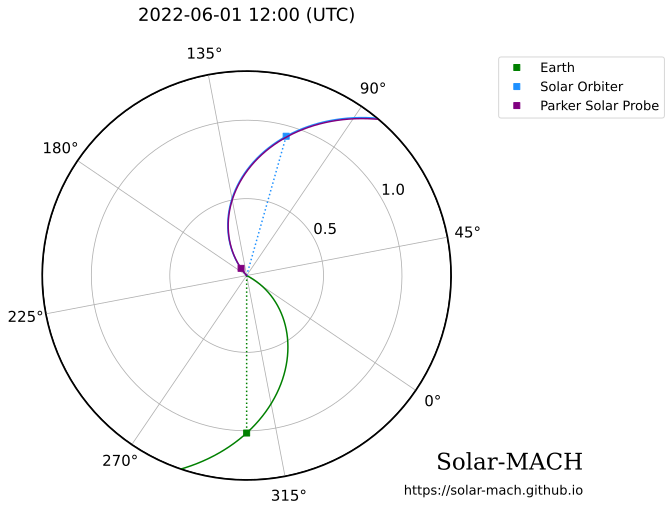

In [ ]:
sm1.plot(plot_sun_body_line=True, show_earth_centered_coord=False)

---

## 2. Example with all the details

First, get a list of available bodies/spacecraft:

In [ ]:
print(print_body_list().index)

Index(['Earth', 'ACE', 'BepiColombo', 'Cassini', 'Europa Clipper', 'JUICE',
       'Juno', 'Jupiter', 'L1', 'Mars', 'Mars Express', 'MAVEN', 'Mercury',
       'MESSENGER', 'PSP', 'Pioneer10', 'Pioneer11', 'Rosetta', 'SOHO',
       'Solar Orbiter', 'STEREO B', 'STEREO A', 'Ulysses', 'Venus', 'Voyager1',
       'Voyager2', 'WIND'],
      dtype='object', name='Key')


In [ ]:
body_list = ['Mercury', 'Venus', 'Earth', 'Mars', 'STEREO A', 'STEREO B', 'Solar Orbiter', 'PSP', 'BepiColombo']
vsw_list = len(body_list) * [350]        # position-sensitive solar wind speed per body in body_list
date = '2021-6-1 12:00:00'

Now we also want to indicate the position (in [Carrington coordinates](https://docs.sunpy.org/en/stable/generated/api/sunpy.coordinates.frames.HeliographicCarrington.html)) and direction of a flare, and the (assumed) solar wind speed at its location:

In [ ]:
reference_long = 0                               # Carrington longitude of reference (None to omit)
reference_lat = 0                                # Carrington latitude of reference (None to omit)
reference_vsw = 400                              # define solar wind speed at reference

In addition, we explicitly provide all availabe plotting options:

In [ ]:
plot_spirals = True                              # plot Parker spirals for each body
plot_sun_body_line = False                       # plot straight line between Sun and body
transparent = False                              # make output figure background transparent
markers = 'numbers'                              # plot each body with a numbered marker
filename = f'Solar-MACH_{date.replace(" ", "_").replace(":", "")}png'  # define filename of output figure

Finally, initializing and plotting with these options. If `outfile` is provided, the plot will be saved next to the Notebook with the provided `filename`.

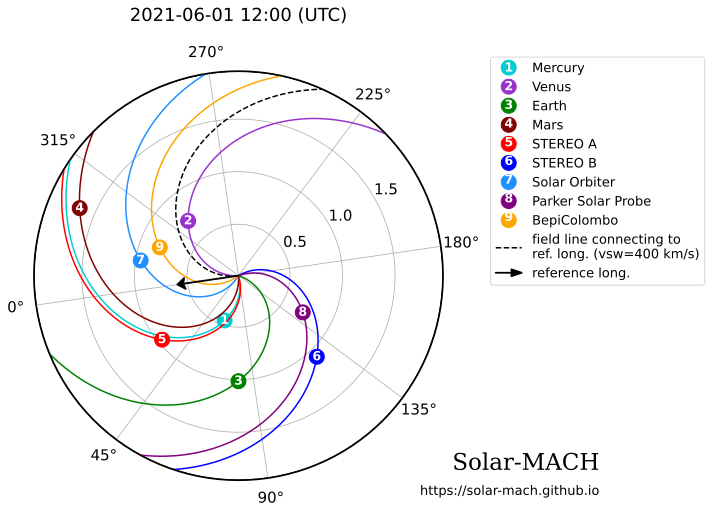

In [ ]:
sm2 = SolarMACH(date, body_list, vsw_list, reference_long, reference_lat)

sm2.plot(plot_spirals=plot_spirals,
         plot_sun_body_line=plot_sun_body_line,
         reference_vsw=reference_vsw,
         transparent=transparent,
         markers=markers,
         outfile=filename
         );

All the data can also be obtained as a Pandas DataFrame for further use:

In [ ]:
df = sm2.coord_table
display(df)

,Spacecraft/Body,Carrington longitude (°),Carrington latitude (°),Heliocentric distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington),Longitudinal separation between body and reference_long,Longitudinal separation between body's magnetic footpoint and reference_long,Latitudinal separation between body and reference_lat
0,Mercury,64.572366,-3.374752,0.456577,-17.161028,-2.767176,350,96.911462,64.572366,96.911462,-3.374752
1,Venus,304.308841,-2.405230,0.718663,-137.424553,-1.797654,350,355.463238,-55.691159,-4.536762,-2.405230
2,Earth,81.733394,-0.607576,1.014084,0.000000,0.000000,350,154.136171,81.733394,154.136171,-0.607576
3,Mars,328.690673,-4.569037,1.657439,-113.042721,-3.961461,350,86.722920,-31.309327,86.722920,-4.569037
4,STEREO A,31.671472,-5.969301,0.963303,-50.061921,-5.361726,350,99.918030,31.671472,99.918030,-5.969301
5,STEREO B,125.736482,4.448713,1.086015,44.003089,5.056289,350,202.978884,125.736482,-157.021116,4.448713
6,Solar Orbiter,342.893742,-1.038420,0.952075,-98.839652,-0.430845,350,50.838628,-17.106258,50.838628,-1.038420
7,PSP,142.038810,3.210198,0.715577,60.305417,3.817774,350,192.923248,142.038810,-167.076752,3.210198
8,BepiColombo,331.970837,-3.538780,0.807266,-109.762557,-2.931204,350,29.390736,-28.029163,29.390736,-3.538780


In [ ]:
df.columns

Index(['Spacecraft/Body', 'Carrington longitude (°)',
       'Carrington latitude (°)', 'Heliocentric distance (AU)',
       'Longitudinal separation to Earth's longitude',
       'Latitudinal separation to Earth's latitude', 'Vsw',
       'Magnetic footpoint longitude (Carrington)',
       'Longitudinal separation between body and reference_long',
       'Longitudinal separation between body's magnetic footpoint and reference_long',
       'Latitudinal separation between body and reference_lat'],
      dtype='object')

In [ ]:
df['Heliocentric distance (AU)'].values

array([0.45657717, 0.71866253, 1.0140839 , 1.65743876, 0.9633026 ,
       1.08601488, 0.95207518, 0.7155775 , 0.80726552])

---

## 3. Example using Stonyhurst coordinates for reference

Let's take a look at the situation at the first ground-level enhancement (GLE) of solar cycle 25 on 28 October 2021 

First, we just provide some options as before:

In [ ]:
body_list = ['STEREO-A', 'Earth', 'BepiColombo', 'PSP', 'Solar Orbiter', 'Mars']
vsw_list = [340, 300, 350, 350, 320, 350]        # position-sensitive solar wind speed per body in body_list
date = '2021-10-28 15:20:00'

# optional parameters
plot_spirals = True                              # plot Parker spirals for each body
plot_sun_body_line = True                        # plot straight line between Sun and body
transparent = False                              # make output figure background transparent
markers = 'numbers'                              # plot each body with a numbered marker
filename = f'Solar-MACH_{date.replace(" ", "_").replace(":", "")}.png'  # define filename of output figure

But now we want to provide the coordinates of the flare in [Stonyhurst coordinates](https://docs.sunpy.org/en/stable/generated/api/sunpy.coordinates.frames.HeliographicStonyhurst.html) (instead of [Carrington](https://docs.sunpy.org/en/stable/generated/api/sunpy.coordinates.frames.HeliographicCarrington.html)). For this, we have to convert them manually to Carrington coordinates for further use (at least at the moment). Note that this conversion is time-dependent.

In [ ]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames

reference_long = 2                               # Stonyhurst longitude of reference (None to omit)
reference_lat = 26                               # Stonyhurst latitude of reference (None to omit)
coord = SkyCoord(reference_long*u.deg, reference_lat*u.deg, frame=frames.HeliographicStonyhurst, obstime=date)
coord = coord.transform_to(frames.HeliographicCarrington(observer='Sun'))
reference_long = coord.lon.value                 # Carrington longitude of reference
reference_lat = coord.lat.value                  # Carrington latitude of reference

reference_vsw = 300                              # define solar wind speed at reference

Finally, initializing and plotting with these options:

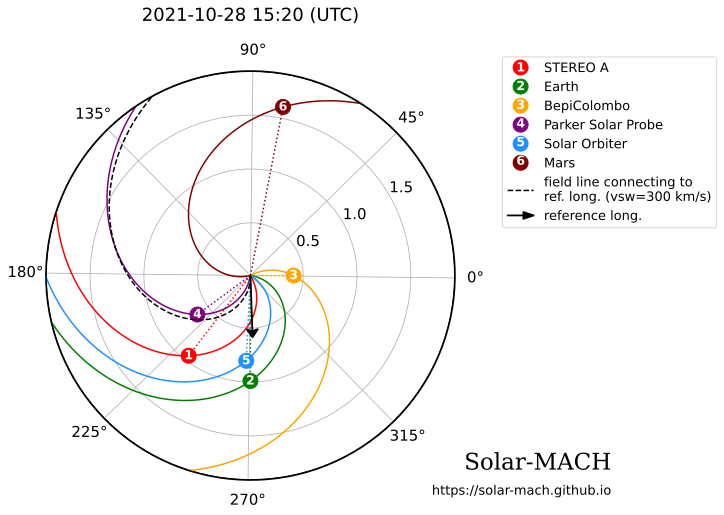

In [ ]:
sm3 = SolarMACH(date, body_list, vsw_list, reference_long, reference_lat)

sm3.plot(plot_spirals=plot_spirals,
         plot_sun_body_line=plot_sun_body_line,
         reference_vsw=reference_vsw,
         transparent=transparent,
         markers=markers,
         outfile=filename
         );

---
## 4. Only obtain data as Pandas DataFrame

We can also just obtain a table with the spatial data, without producing a plot at all.

First provide necessary options:

In [ ]:
body_list = ['STEREO-A', 'Earth', 'BepiColombo', 'PSP', 'Solar Orbiter', 'Mars']
vsw_list = [400, 400, 400, 400, 400, 400]        # position-sensitive solar wind speed per body in body_list
date = '2022-6-1 12:00:00'

Then initialize `SolarMACH` and obtain data as Pandas DataFrame:

In [ ]:
sm4 = SolarMACH(date, body_list, vsw_list)
df = sm4.coord_table
display(df)

,Spacecraft/Body,Carrington longitude (°),Carrington latitude (°),Heliocentric distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington)
0,STEREO-A,275.723519,-3.999101,0.961350,-28.467770,-3.361511,400,335.567184
1,Earth,304.191289,-0.637590,1.014043,0.000000,0.000000,400,7.540620
2,BepiColombo,330.303663,-1.980526,0.570656,26.112374,-1.342935,400,5.799579
3,PSP,162.142527,-2.129720,0.068022,-142.048762,-1.492130,400,166.116201
4,Solar Orbiter,108.356480,2.066308,0.933521,-195.834809,2.703898,400,166.604421
5,Mars,16.893904,4.867268,1.384205,-287.297385,5.504858,400,103.046865


If we also provide the `reference` information, it will be available in the table, too:

In [ ]:
sm4 = SolarMACH(date, body_list, vsw_list, reference_long=273, reference_lat=7)
df = sm4.coord_table
display(df)

,Spacecraft/Body,Carrington longitude (°),Carrington latitude (°),Heliocentric distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington),Longitudinal separation between body and reference_long,Longitudinal separation between body's magnetic footpoint and reference_long,Latitudinal separation between body and reference_lat
0,STEREO-A,275.723519,-3.999101,0.961350,-28.467770,-3.361511,400,335.567184,2.723519,62.567184,-10.999101
1,Earth,304.191289,-0.637590,1.014043,0.000000,0.000000,400,7.540620,31.191289,94.540620,-7.637590
2,BepiColombo,330.303663,-1.980526,0.570656,26.112374,-1.342935,400,5.799579,57.303663,92.799579,-8.980526
3,PSP,162.142527,-2.129720,0.068022,-142.048762,-1.492130,400,166.116201,-110.857473,-106.883799,-9.129720
4,Solar Orbiter,108.356480,2.066308,0.933521,-195.834809,2.703898,400,166.604421,-164.643520,-106.395579,-4.933692
5,Mars,16.893904,4.867268,1.384205,-287.297385,5.504858,400,103.046865,-256.106096,-169.953135,-2.132732


---
# 5. Ideas for further usage

## 5.1 Loop over multiple datetimes (plots)

This might be useful to either:

- read-in an *event catalog*, and loop over those datetimes to quickly get the constellations of all these events,
- create a series of daily constellation plots, and combine them into one animation:

In [ ]:
body_list = ['Mercury', 'Venus', 'Earth', 'Mars', 'STEREO A', 'STEREO B', 'Solar Orbiter', 'PSP', 'BepiColombo']
vsw_list = len(body_list) * [350]                # position-sensitive solar wind speed per body in body_list
plot_spirals = True                              # plot Parker spirals for each body
plot_sun_body_line = False                       # plot straight line between Sun and body
transparent = False                              # make output figure background transparent
markers = 'numbers'                              # plot each body with a numbered marker

for i in range(1,31,1):    
    j = str(i).rjust(2, '0')
    date = f'2022-6-{j} 12:00:00'
    filename = f'Solar-MACH_{date.replace(" ", "_").replace(":", "")}.png'  # define filename of output figure

    sm5 = SolarMACH(date, body_list, vsw_list)
    sm5.plot(plot_spirals=plot_spirals,
             plot_sun_body_line=plot_sun_body_line,
             transparent=transparent,
             markers=markers,
             outfile=filename
             )

Get a sorted list of the files just created using `glob`:

In [ ]:
import glob
files = sorted(glob.glob(filename.replace(f'{i}', '*')))

In [ ]:
import imageio.v2 as imageio

with imageio.get_writer('solarmach.gif', mode='I') as writer:
    for filename in files:
        image = imageio.imread(filename)
        writer.append_data(image)

![](solarmach.gif)

## 5.2 Loop over multiple datetimes (only data)

For example, to look for spacecraft alignments, like *"When are PSP and Solar Orbiter at the same magnetic footpoint?"*

In [ ]:
body_list = ['Mercury', 'Venus', 'Earth', 'Mars', 'STEREO A', 'Solar Orbiter', 'PSP', 'BepiColombo']
vsw_list = len(body_list) * [350]                # position-sensitive solar wind speed per body in body_list

df = []
dates = []
for i in range(1,31,1):
    date = f'2022-6-{i} 12:00:00'
    filename = f'Solar-MACH_{date.replace(" ", "_").replace(":", "")}.png'  # define filename of output figure

    sm6 = SolarMACH(date, body_list, vsw_list)
    df = df + [sm6.coord_table]
    dates = dates + [date]

In [ ]:
display(df[0])
display(df[1])
display(df[2])

,Spacecraft/Body,Carrington longitude (°),Carrington latitude (°),Heliocentric distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington)
0,Mercury,323.876115,-2.859636,0.463772,19.684826,-2.222046,350,356.752507
1,Venus,31.716740,3.831265,0.727677,-272.474549,4.468855,350,83.419097
2,Earth,304.191289,-0.637590,1.014043,0.000000,0.000000,350,16.590524
3,Mars,16.893904,4.867268,1.384205,-287.297385,5.504858,350,115.354431
4,STEREO A,275.723519,-3.999101,0.961350,-28.467770,-3.361511,350,344.116279
5,Solar Orbiter,108.356480,2.066308,0.933521,-195.834809,2.703898,350,174.925555
6,PSP,162.142527,-2.129720,0.068022,-142.048762,-1.492130,350,166.683868
7,BepiColombo,330.303663,-1.980526,0.570656,26.112374,-1.342935,350,10.870424


,Spacecraft/Body,Carrington longitude (°),Carrington latitude (°),Heliocentric distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington)
0,Mercury,312.491958,-2.767844,0.462360,21.534050,-2.250857,350,345.270835
1,Venus,19.119013,3.842344,0.727614,-271.838895,4.359331,350,70.815887
2,Earth,290.957908,-0.516987,1.014192,0.000000,0.000000,350,3.369998
3,Mars,3.343348,4.898746,1.383924,-287.614560,5.415732,350,101.777389
4,STEREO A,262.581461,-3.886074,0.961251,-28.376447,-3.369087,350,330.980112
5,Solar Orbiter,94.958003,2.013818,0.938470,-195.999905,2.530805,350,161.884803
6,PSP,228.643627,-3.525050,0.070738,-62.314281,-3.008064,350,233.371677
7,BepiColombo,318.151575,-1.914722,0.563218,27.193667,-1.397735,350,358.187432


,Spacecraft/Body,Carrington longitude (°),Carrington latitude (°),Heliocentric distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington)
0,Mercury,301.126183,-2.668769,0.460674,23.402013,-2.272493,350,333.788031
1,Venus,6.521607,3.850487,0.727547,-271.202563,4.246762,350,58.213006
2,Earth,277.724170,-0.396276,1.014336,0.000000,0.000000,350,350.148300
3,Mars,349.793102,4.929639,1.383657,72.068933,5.325915,350,88.201748
4,STEREO A,249.439336,-3.771741,0.961152,-28.284834,-3.375465,350,317.843662
5,Solar Orbiter,81.551363,1.961497,0.943258,-196.172807,2.357773,350,148.824315
6,PSP,258.282649,-1.451904,0.110116,-19.441521,-1.055628,350,265.844496
7,BepiColombo,306.054489,-1.844628,0.555575,28.330320,-1.448352,350,345.544727


In [ ]:
display(dates)

['2022-6-1 12:00:00',
 '2022-6-2 12:00:00',
 '2022-6-3 12:00:00',
 '2022-6-4 12:00:00',
 '2022-6-5 12:00:00',
 '2022-6-6 12:00:00',
 '2022-6-7 12:00:00',
 '2022-6-8 12:00:00',
 '2022-6-9 12:00:00',
 '2022-6-10 12:00:00',
 '2022-6-11 12:00:00',
 '2022-6-12 12:00:00',
 '2022-6-13 12:00:00',
 '2022-6-14 12:00:00',
 '2022-6-15 12:00:00',
 '2022-6-16 12:00:00',
 '2022-6-17 12:00:00',
 '2022-6-18 12:00:00',
 '2022-6-19 12:00:00',
 '2022-6-20 12:00:00',
 '2022-6-21 12:00:00',
 '2022-6-22 12:00:00',
 '2022-6-23 12:00:00',
 '2022-6-24 12:00:00',
 '2022-6-25 12:00:00',
 '2022-6-26 12:00:00',
 '2022-6-27 12:00:00',
 '2022-6-28 12:00:00',
 '2022-6-29 12:00:00',
 '2022-6-30 12:00:00']